# Week 8 Lecture 
This week you will learn about Sampling. 



In [ ]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *


# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# Rolling two dice

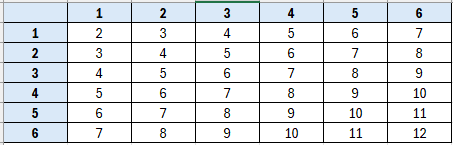

Create a table with the results of rolling two 6 sided dice

In [ ]:
# Create a histogram of the outcomes with Theorectical Probability (outcomes are equally likely)


# Probability Distribution Function

- Each Probability Distribution Function has probabilities (percentages) between 0 and 1.
- The sum of the probabilities is 1.
- Each probability distribution has a mean.
- Each probability distribution has a standard deviation.

In [ ]:
# Group the data by Throw to see the frequency fo 


In [ ]:
# Compute the P(x) probability as count/total of count put in column called P(X) in table
# table_p


In [ ]:
# compute the mean column as Throw * P(X)


In [ ]:
#Compute the Mean of the distribution as the sum of mean_column round to 4 decimal places


In [ ]:
# Compute the standard deviation of the probability distribution.  This tells how spread out
# the data is about the mean.  You must first compute the variance.
# var_column =  P(X) * (Throw - mean)**2
# add the column to the table_p
# display the table




In [ ]:
# standard deviation is the sum of the Variance column then take the square root
# round to four decimal places


# Empirical Distribution
A new method for taking a sample of n rolls of two dice is
```
table_name_outcomes.sample(n)  # n is number of samples 
```


In [ ]:
# start with die table and take a sample of 10 rolls of the dice display the results


In [ ]:
# create a function to display the result in a histogram using bins defined in die_bins


# Empirical Distribution
If we conduct a number of experiments or simulations of taking the sample as the number of times we conduct the experiment will lead to a histogram that resembles the one above based on theorectical probability.
<br>

# Law of Averages
If a chance experiment is repeated independently and under identical conditions, then in the long run, the proportion of times that an event occurs gets closer and closer to the theorectical probability of the event.


In [ ]:
# run the empirical_hist_die function 10 times


In [ ]:
# run function 100 times


In [ ]:
# run function 1000 times

In [ ]:
# run function 5000 times

In [ ]:
# run function 10000 times

In [ ]:
# run function 15000 times

In [ ]:
# run function 50000 times

# Sampling from a Population


In [ ]:
# Read in the Population for United Airline plane departures

united = Table.read_table('united.csv')
united

In [ ]:
# minimum minutes

united.column('Delay').min()

In [ ]:
united.column('Delay').max()

In [ ]:
delay_bins = np.append(np.arange(-20, 301, 10), 600)
united.hist('Delay', bins = delay_bins, unit='minutes')

In [ ]:
united.where('Delay', are.above(200)).num_rows/united.num_rows

In [ ]:
delay_bins = np.arange(-20, 201, 10)
united.hist('Delay', bins = delay_bins, unit='minute')

In [ ]:
united.where('Delay', are.between(0, 10)).num_rows/united.num_rows

In [ ]:
def empirical_hist_delay(n):
    united.sample(n).hist('Delay', bins = delay_bins, unit = 'minute')

In [ ]:
empirical_hist_delay(10)

In [ ]:
empirical_hist_delay(100)

In [ ]:
empirical_hist_delay(1000)

In [ ]:
sample_1000 = united.sample(1000)
sample_1000.hist('Delay', bins = delay_bins, unit = 'minute')
plt.title('Sample of Size 1000');

# Parameter
Values from the population.

In [ ]:
np.median(united.column('Delay'))

In [ ]:
united.where('Delay', are.below_or_equal_to(2)).num_rows/united.num_rows

In [ ]:
united.where('Delay', are.equal_to(2)).num_rows

# Statistic
np.median(sample_1000.column('Delay'))

# Simulating a Statistic
**Step 1: Decide which statistic to simulate.**  Simulate the median of a random sample of size 1000 drawn from the population of flight delays.<br>
**Step 2: Define a function that returns one simulated value of the statistic.** Draw a random sample of size 1000 and compute the median of the sample.  We did this in the code cell above.<br>
**Step 3: Decide how many simulated values to generate.**  Let's do 5,000 repetitions.<br>
**Step 4: Use a for loop to generate an array of simulated values.** Create a empty array in which to collect our results.  We will then set up a for loop for generating all the simulated values.  The body of the loop with consist of generating one simulated value of the sample median, and appending it to our collection array.

In [ ]:
def random_sample_median():
    return np.median(united.sample(1000).column('Delay'))

In [ ]:
medians = make_array()

for i in np.arange(5000):
    medians = np.append(medians, random_sample_median())

# Visualization

In [ ]:
simulated_medians = Table().with_column('Sample Median', medians)
simulated_medians

In [ ]:
simulated_medians.column('Sample Median').min()

In [ ]:
simulated_medians.column('Sample Median').max()

In [ ]:
simulated_medians.hist(bins = np.arange(0.5, 5, 1))

# Sampling from a Population in a Table


In [ ]:

faces = np.arange(1,7)
die = Table().with_columns('Face', faces)
die


In [ ]:
# Simulate 7 rolls
die.sample(7)

In [ ]:
actors = Table.read_table('actors.csv')
actors

In [ ]:
# Simple random sample of 5 rows
actors.sample(5, with_replacement=False)

# Sampling from a Population in an Array

In [ ]:
# The faces of a die, as an array
faces

In [ ]:
# 7 rolls of the die
np.random.choice(faces, 7)

In [ ]:
# Array of actor names
actor_names = actors.column('Actor')

In [ ]:
# Simple random sample of 5 actor names
np.random.choice(actor_names, 5, replace=False)

In [ ]:
# Sampling from a Categorical Distribution
